# Import Libraries

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold


from sklearn.impute import SimpleImputer 


# to help doing Cross-validation
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier

# Ignore Warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", UserWarning)

# Load Dataset & Discover it

In [55]:
cols = ['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data']
data = pd.read_csv('horse-colic.csv',  header = None, na_values = '?', names = cols, index_col=0)
data.head(), data.shape

(         age  hospital_number  rectal_temp  pulse  respiratory_rate  \
 surgery                                                               
 2.0        1           530101         38.5   66.0              28.0   
 1.0        1           534817         39.2   88.0              20.0   
 2.0        1           530334         38.3   40.0              24.0   
 1.0        9          5290409         39.1  164.0              84.0   
 2.0        1           530255         37.3  104.0              35.0   
 
          temp_of_extremities  peripheral_pulse  mucous_membrane  \
 surgery                                                           
 2.0                      3.0               3.0              NaN   
 1.0                      NaN               NaN              4.0   
 2.0                      1.0               1.0              3.0   
 1.0                      4.0               1.0              6.0   
 2.0                      NaN               NaN              6.0   
 
          capill

In [56]:
data['outcome'].value_counts()

1.0    178
2.0     77
3.0     44
Name: outcome, dtype: int64

In [57]:
# summarize the number of rows with missing values for each column
for i in range(data.shape[1]):
# count number of rows with missing values
    n_miss = data.iloc[i].isnull().sum()
    perc = n_miss / data.shape[0] * 100
    print('{} is Missing {} Features with {} %'.format(data.columns[i], n_miss, perc, '.1g'))

age is Missing 6 Features with 2.0 %
hospital_number is Missing 5 Features with 1.6666666666666667 %
rectal_temp is Missing 5 Features with 1.6666666666666667 %
pulse is Missing 1 Features with 0.33333333333333337 %
respiratory_rate is Missing 12 Features with 4.0 %
temp_of_extremities is Missing 8 Features with 2.666666666666667 %
peripheral_pulse is Missing 3 Features with 1.0 %
mucous_membrane is Missing 8 Features with 2.666666666666667 %
capillary_refill_time is Missing 4 Features with 1.3333333333333335 %
pain is Missing 4 Features with 1.3333333333333335 %
peristalsis is Missing 0 Features with 0.0 %
abdominal_distention is Missing 4 Features with 1.3333333333333335 %
nasogastric_tube is Missing 4 Features with 1.3333333333333335 %
nasogastric_reflux is Missing 2 Features with 0.6666666666666667 %
nasogastric_reflux_ph is Missing 1 Features with 0.33333333333333337 %
rectal_exam_feces is Missing 3 Features with 1.0 %
abdomen is Missing 3 Features with 1.0 %
packed_cell_volume is

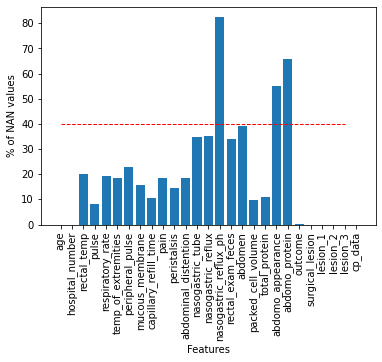

In [58]:
# Our threshold for missing dfata is 40 %
nan_per=data.isna().sum()/len(data)*100
plt.bar(range(len(nan_per)),nan_per)
plt.xlabel('Features')
plt.ylabel('% of NAN values')
plt.plot([0, 25], [40,40], 'r--', lw=1)
plt.xticks(list(range(len(data.columns))),list(data.columns.values),rotation='vertical');
# ';' to hide the description of the plot

In [59]:
for col in data.columns.values:
    if data[col].isnull().sum() < (40/100*len(data)):
        data[col]=data[col].fillna(data[col].median())

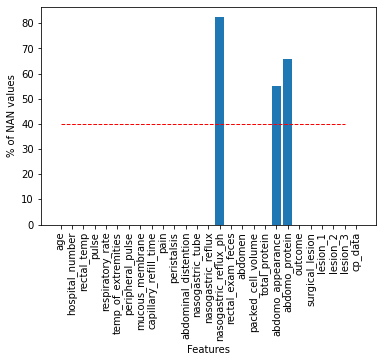

In [60]:
# Our threshold for missing dfata is 40 %
nan_per=data.isna().sum()/len(data)*100
plt.bar(range(len(nan_per)),nan_per)
plt.xlabel('Features')
plt.ylabel('% of NAN values')
plt.plot([0, 25], [40,40], 'r--', lw=1)
plt.xticks(list(range(len(data.columns))),list(data.columns.values),rotation='vertical');
# ';' to hide the description of the plot

In [61]:
print("Data Size Before Numerical NAN Column(>40%) Removal :",data.shape)
for col in data.columns.values:
    if data[col].isnull().sum() > (40/100*len(data)):
        print(col,"removed")
        data=data.drop([col], axis=1)
print("Data Size After Numerical NAN Column(>40%) Removal :",data.shape)

Data Size Before Numerical NAN Column(>40%) Removal : (300, 27)
nasogastric_reflux_ph removed
abdomo_appearance removed
abdomo_protein removed
Data Size After Numerical NAN Column(>40%) Removal : (300, 24)


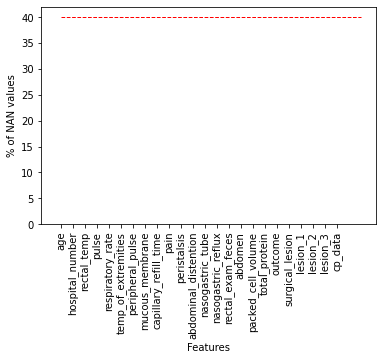

In [62]:
# Our threshold for missing dfata is 40 %
nan_per=data.isna().sum()/len(data)*100
plt.bar(range(len(nan_per)),nan_per)
plt.xlabel('Features')
plt.ylabel('% of NAN values')
plt.plot([0, 25], [40,40], 'r--', lw=1)
plt.xticks(list(range(len(data.columns))),list(data.columns.values),rotation='vertical');
# ';' to hide the description of the plot

In [63]:
data.isnull().sum()

age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [64]:
# Remove Unneccessary Columns
data.drop('cp_data', axis = 1)

,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3
surgery,,,,,,,,,,,,,,,,,,,,,
2.0,1,530101,38.5,66.0,28.0,3.0,3.0,3.0,2.0,5.0,...,1.0,3.0,5.0,45.0,8.4,2.0,2,11300,0,0
1.0,1,534817,39.2,88.0,20.0,3.0,2.0,4.0,1.0,3.0,...,1.0,4.0,2.0,50.0,85.0,3.0,2,2208,0,0
2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,...,1.0,1.0,1.0,33.0,6.7,1.0,2,0,0,0
1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,...,2.0,3.0,4.0,48.0,7.2,2.0,1,2208,0,0
2.0,1,530255,37.3,104.0,35.0,3.0,2.0,6.0,2.0,3.0,...,1.0,3.0,4.0,74.0,7.4,2.0,2,4300,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.0,1,533886,38.2,120.0,70.0,4.0,2.0,4.0,2.0,2.0,...,1.0,3.0,5.0,55.0,65.0,3.0,2,3205,0,0
2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,4.0,...,1.0,4.0,4.0,44.0,7.5,3.0,1,2208,0,0
1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,4.0,...,1.0,3.0,5.0,60.0,6.8,2.0,1,3205,0,0


# Visualization

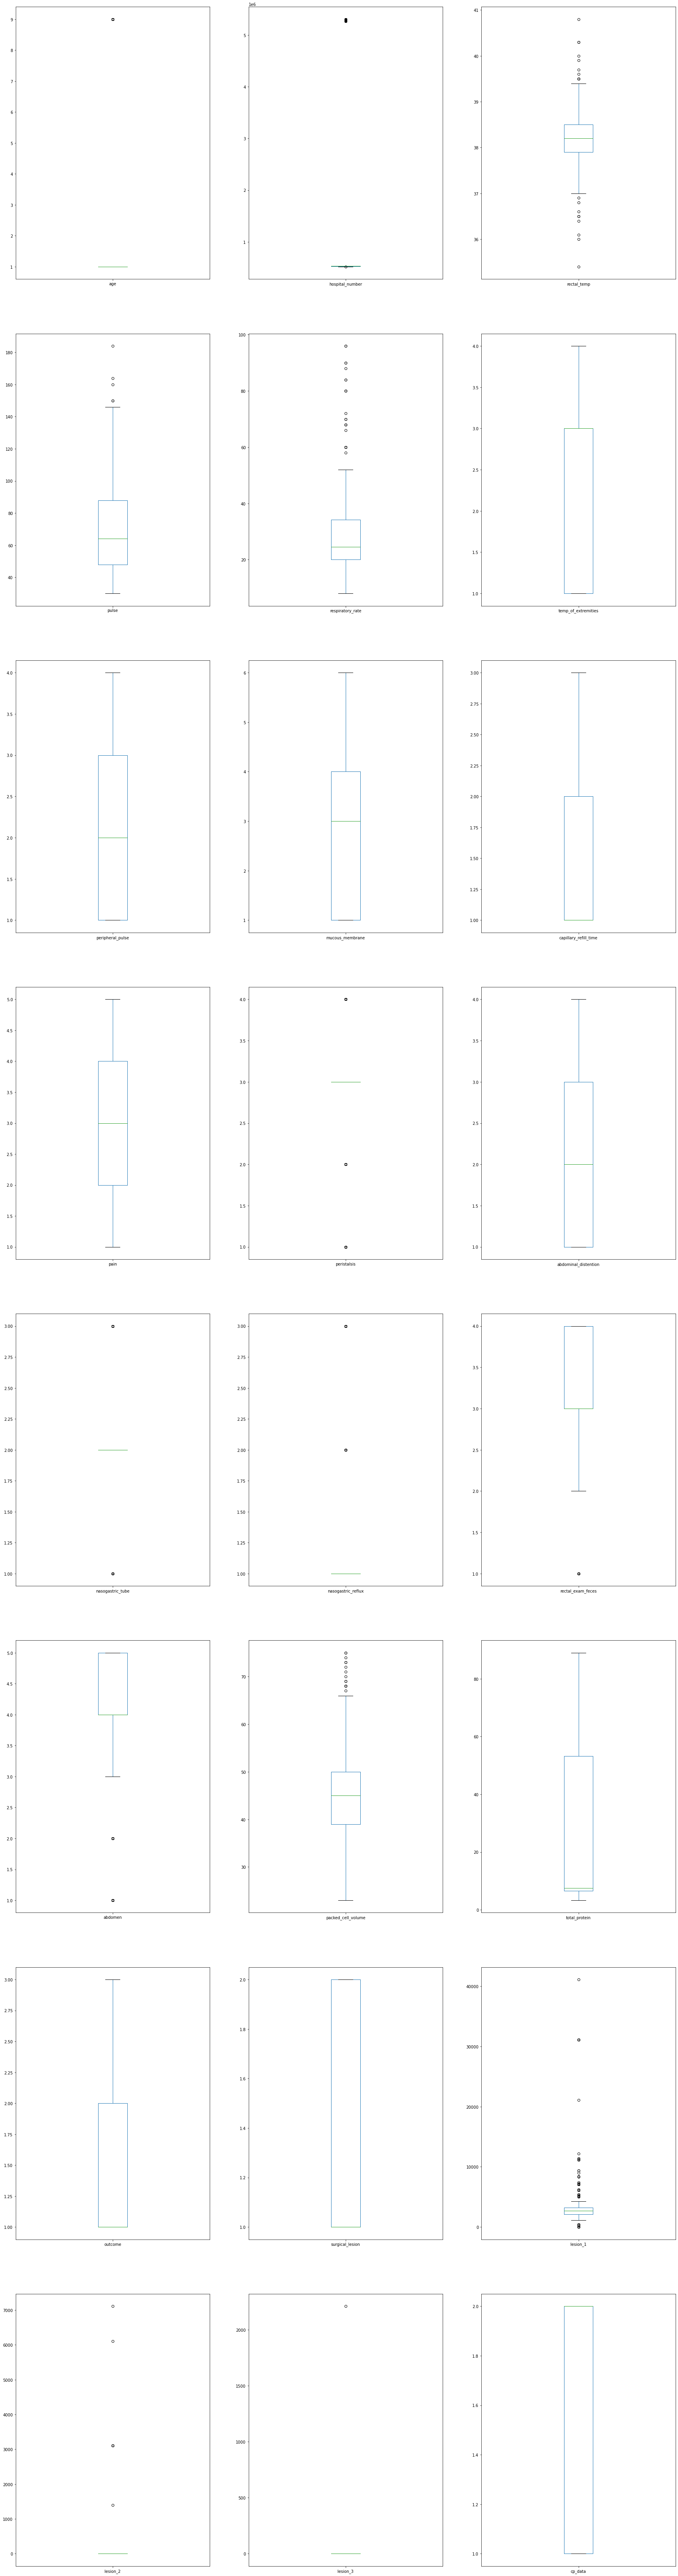

In [65]:
# Box and whisker plot 
#data.plot?
data.plot(kind = 'box', subplots = True, layout = (10, 3), figsize = (30, 150), sharex = False)
plt.show()

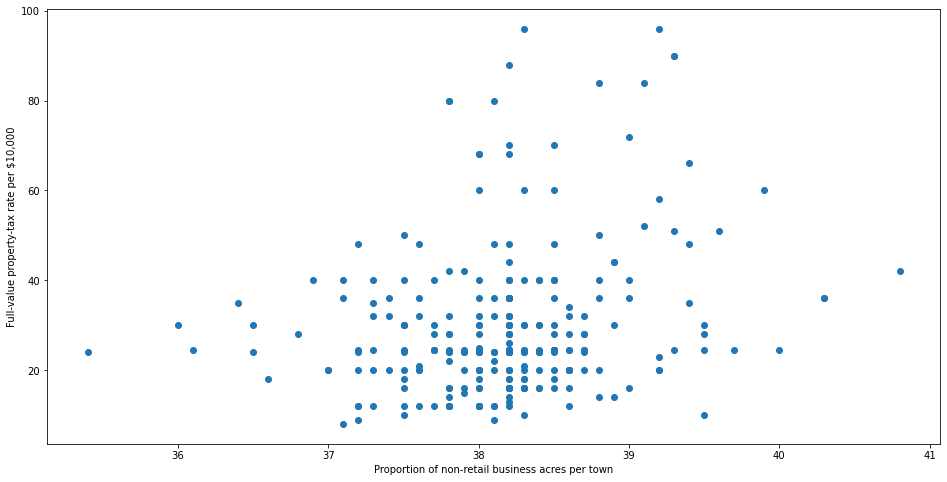

In [66]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['rectal_temp'], data['respiratory_rate'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

# Outliers

In [ ]:
# split into input and output elements

X = data.drop('outcome', axis = 1)
y = data.outcome


In [71]:
# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.743 (0.082)


>mean 0.746 (0.052)
>median 0.730 (0.067)
>most_frequent 0.736 (0.078)
>constant 0.729 (0.073)


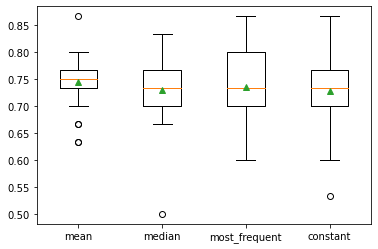

In [74]:
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

In [78]:
# Define New test
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, 2, 5, 4, 4, 3, 5, 45.00, 8.40, 12, 22, 2, 11300, 0, 0, 2]

In [79]:
# create the modeling pipeline
pipeline = Pipeline(steps=[('i', SimpleImputer(strategy='constant')), ('m', RandomForestClassifier())])
# fit the model
pipeline.fit(X, y)

# make a prediction
yhat = pipeline.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


In [82]:
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 2)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto', kernel="rbf")))
models.append(('rf', RandomForestClassifier(random_state=42)))

>mean 0.722 (0.071)
>median 0.739 (0.081)
>most_frequent 0.738 (0.070)
>constant 0.734 (0.076)


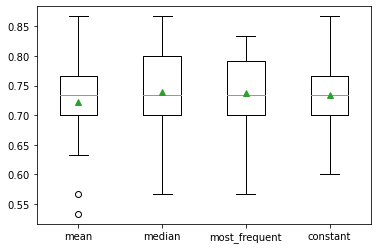

In [83]:
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', model)])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()